In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta

In [4]:
#read parquet files

df = pd.read_parquet("/home/user/Desktop/wheres-my-taxi/wheres-my-taxi/2019_data/yellow_tripdata_2019-01.parquet")

In [5]:
df = df[:2000000].copy()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,NaN


### Data Preprocessing

In [6]:
df.shape

(2000000, 19)

In [7]:
col_names = df.columns
col_names

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [9]:
#check for null values
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1999991
airport_fee              2000000
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,2000000.0,1.639510,0.546452,1.00,1.00,2.00,2.00,4.00
passenger_count,2000000.0,1.590160,1.237657,0.00,1.00,1.00,2.00,9.00
trip_distance,2000000.0,2.931341,3.884399,0.00,0.94,1.60,2.92,142.88
RatecodeID,2000000.0,1.063395,0.685595,1.00,1.00,1.00,1.00,99.00
PULocationID,2000000.0,164.124254,66.606805,1.00,125.00,162.00,234.00,265.00
DOLocationID,2000000.0,162.308627,70.826718,1.00,112.00,162.00,234.00,265.00
payment_type,2000000.0,1.325425,0.488044,1.00,1.00,1.00,2.00,4.00
fare_amount,2000000.0,12.471249,59.896809,-300.00,6.00,8.50,13.50,34674.65
extra,2000000.0,0.327359,0.481806,-4.50,0.00,0.00,0.50,18.50
mta_tax,2000000.0,0.496624,0.046238,-0.50,0.50,0.50,0.50,0.90


fare amount, trip distance, total amount has std > mean. 
congestion surcharge and airport fee can be dropped. RatecodeID has max value of 9(Expected upto 6).

In [11]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)


There are 1 categorical variables

The categorical variables are : ['store_and_fwd_flag']


In [12]:
#Drop all the rows having Pickup and dropoff location outside 1 to 263
#Drop all rows having date not 2019
#Drop rows having trip distance,duration, fare less than or equal to 0

df = df.drop(df[((df.PULocationID>263) | (df.PULocationID<1) | (df.DOLocationID>263) | (df.DOLocationID<1) | (df.tpep_pickup_datetime.dt.year!=2019) | (df.trip_distance==0) | (df.fare_amount<=0) | (df.total_amount<=0))].index)

In [13]:
df = df.drop(['extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge','airport_fee'],axis=1)

In [14]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount'],
      dtype='object')

In [15]:
#add total seconds, duration

df['total_sec'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()
df['duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [16]:
#add columns of days, hour, and month

df['PUmonth'] = df['tpep_pickup_datetime'].dt.month
df['DOmonth'] = df['tpep_dropoff_datetime'].dt.month
df['PUday'] = df['tpep_pickup_datetime'].dt.day_name()
df['DOday'] = df['tpep_dropoff_datetime'].dt.day_name()
df['PUhour'] = df['tpep_pickup_datetime'].dt.hour
df['DOhour'] = df['tpep_dropoff_datetime'].dt.hour

In [17]:
def Duration(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late Night'
    
    
df['PUtime'] = df['PUhour'].apply(Duration)
df['DOtime'] = df['DOhour'].apply(Duration)

In [18]:
taxizone = pd.read_csv("taxizone.csv")
df['PUZone'] = df.PULocationID.map(taxizone.Zone)
df['DOZone'] = df.DOLocationID.map(taxizone.Zone)

In [19]:
df.to_pickle("pickled_parquet_1.pkl")

# Univariate analysis

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [2]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [19]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96671 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               96671 non-null  int64          
 1   tpep_pickup_datetime   96671 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  96671 non-null  datetime64[ns] 
 3   passenger_count        96671 non-null  float64        
 4   trip_distance          96671 non-null  float64        
 5   RatecodeID             96671 non-null  float64        
 6   store_and_fwd_flag     96671 non-null  object         
 7   PULocationID           96671 non-null  int64          
 8   DOLocationID           96671 non-null  int64          
 9   payment_type           96671 non-null  int64          
 10  fare_amount            96671 non-null  float64        
 11  total_amount           96671 non-null  float64        
 12  total_sec              96671 non-null  float64

<AxesSubplot: ylabel='VendorID'>

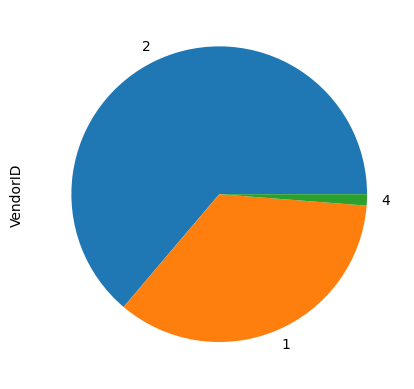

In [21]:
df['VendorID'].value_counts().plot.pie()

In [22]:
df['RatecodeID'].value_counts()

1.0     94181
2.0      1866
5.0       330
3.0       282
4.0         7
99.0        5
Name: RatecodeID, dtype: int64

In [23]:
df['passenger_count'].value_counts()

1.0    62919
2.0    17532
3.0     5233
5.0     4459
6.0     2806
4.0     2554
0.0     1167
8.0        1
Name: passenger_count, dtype: int64

In [24]:
df.passenger_count.isnull().sum()

0

0 passenger count 107177. 28111 null values in passenger count.

In [25]:
#autofill passenger count as 1 if NAN

df.passenger_count = df.passenger_count.fillna(1)


<AxesSubplot: xlabel='passenger_count', ylabel='count'>

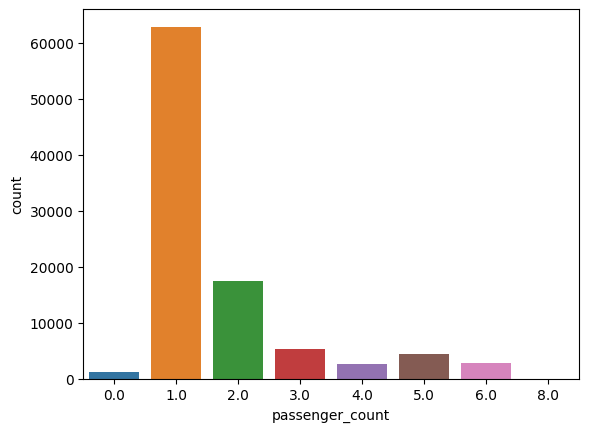

In [26]:
sns.countplot(data=df, x='passenger_count')

.

.

### Day, Time, Month

<AxesSubplot: title={'center': 'Dropoff Days'}, xlabel='DOday', ylabel='count'>

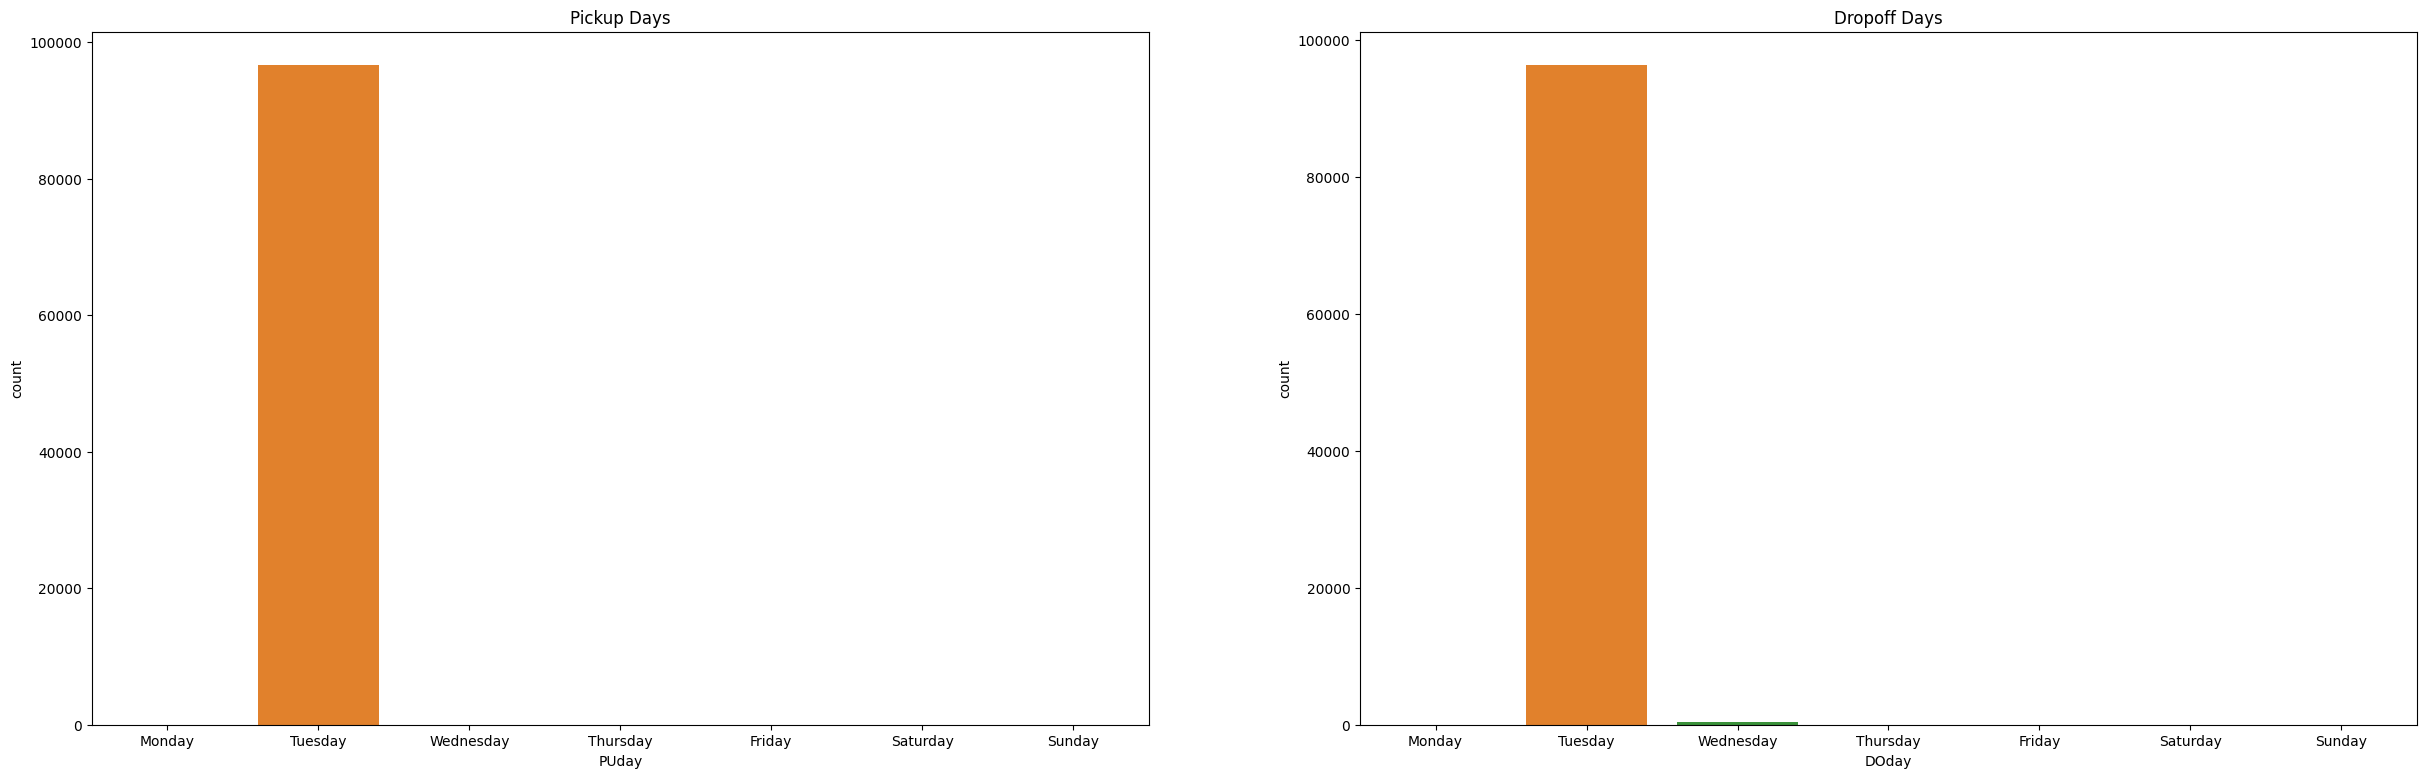

In [27]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(30,9))
ax1.set_title("Pickup Days")
sns.countplot(x='PUday', data=df, ax=ax1, order=days)
ax2.set_title("Dropoff Days")
sns.countplot(x='DOday', data=df, ax=ax2, order=days)

<AxesSubplot: title={'center': 'Dropoff time'}, xlabel='DOtime', ylabel='count'>

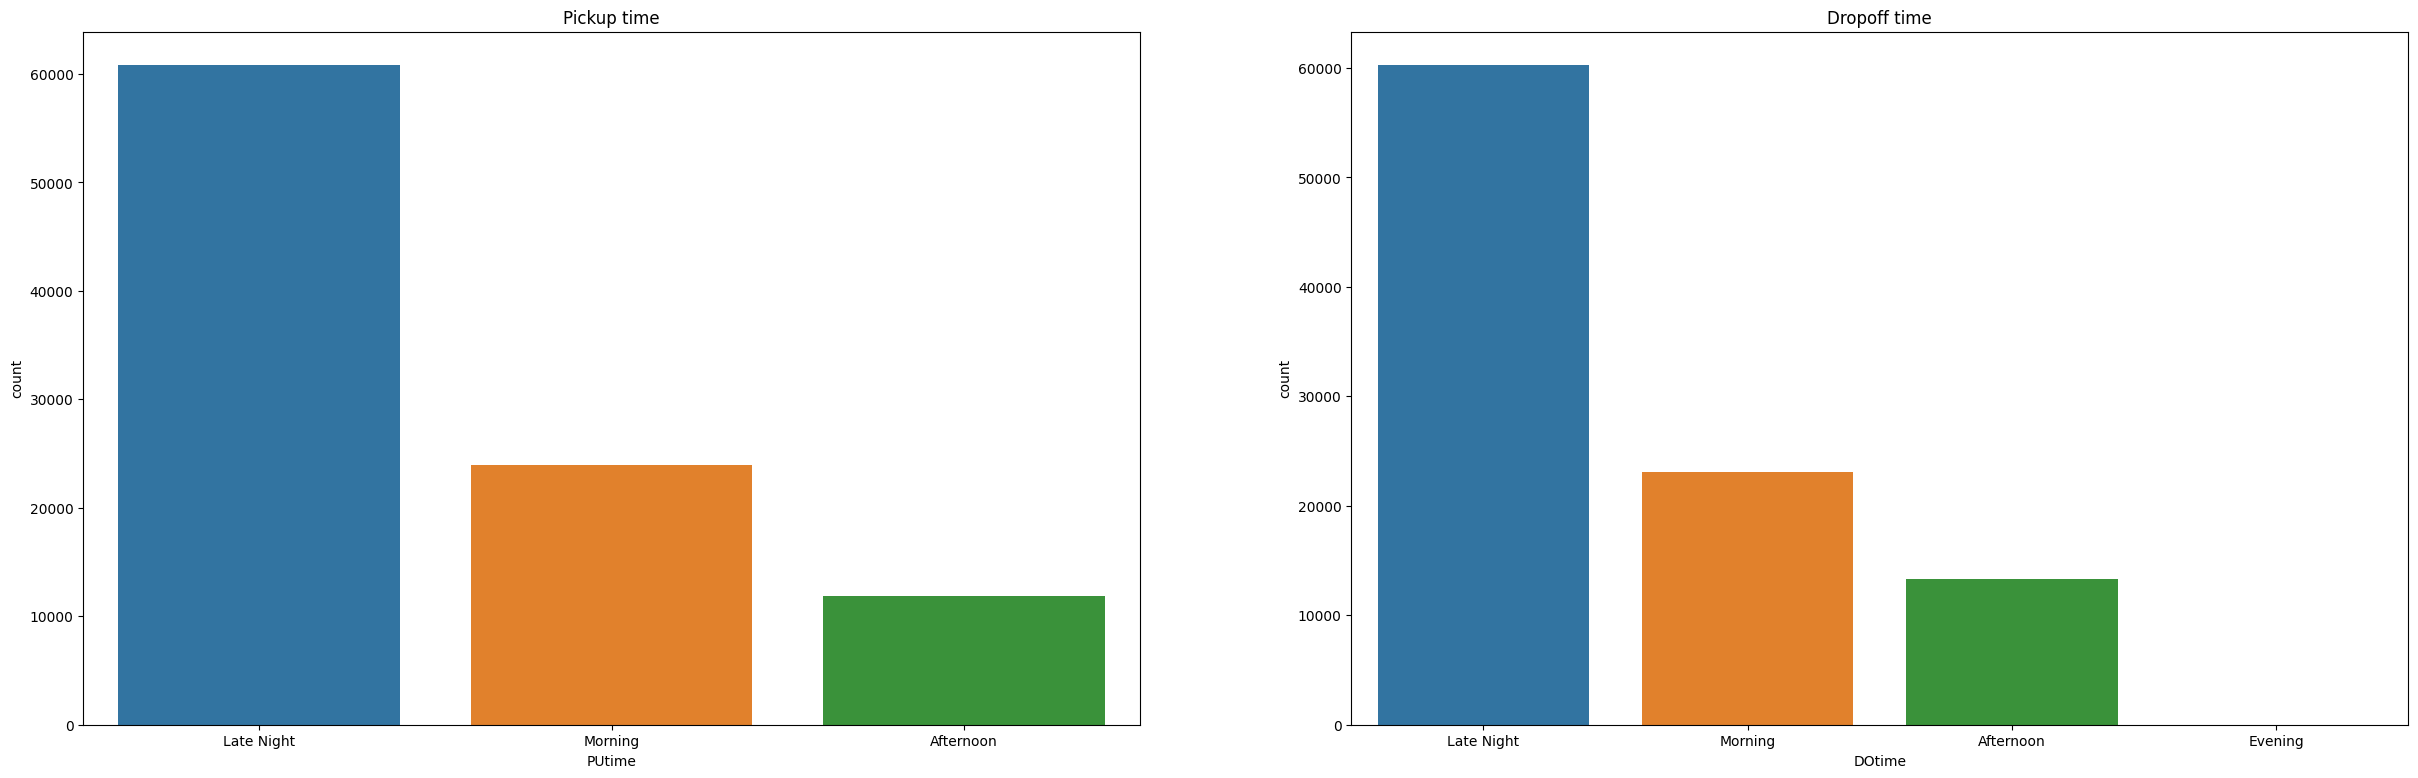

In [28]:
fig, (ax3,ax4) = plt.subplots(ncols=2, figsize=(30,9))
ax3.set_title("Pickup time")
sns.countplot(x='PUtime', data=df, ax=ax3)
ax4.set_title("Dropoff time")
sns.countplot(x='DOtime', data=df, ax=ax4)

<AxesSubplot: title={'center': 'Total time in sec'}, xlabel='total_sec'>

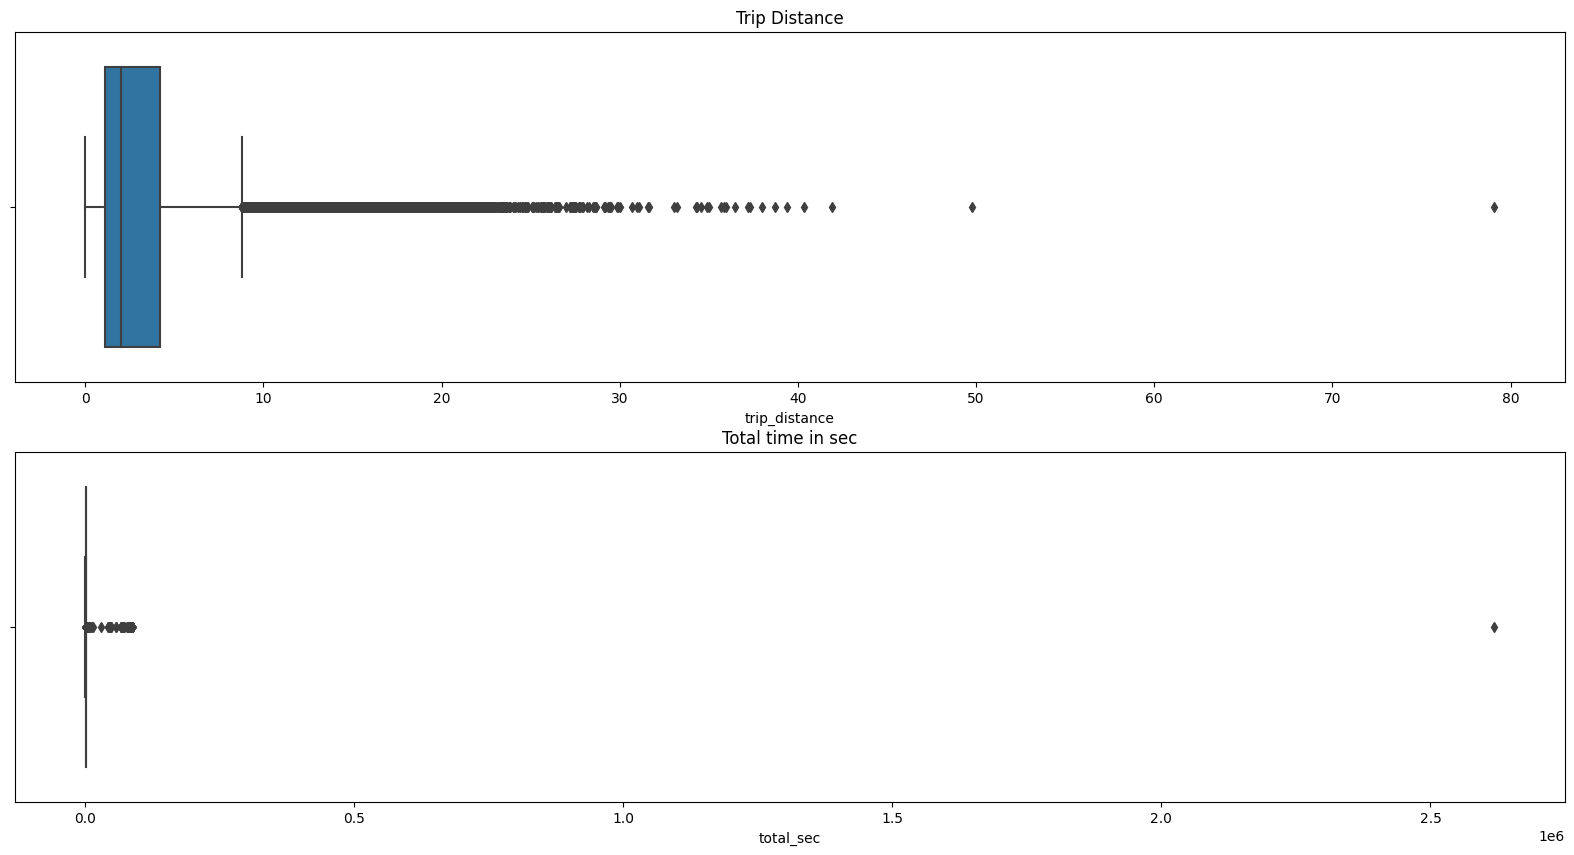

In [29]:
fig, (ax5,ax6) = plt.subplots(nrows=2, figsize=(20,10))
ax5.set_title("Trip Distance")
sns.boxplot(x=df.trip_distance,ax=ax5)
ax6.set_title("Total time in sec")
sns.boxplot(x=df.total_sec,ax=ax6)


<AxesSubplot: title={'center': 'Total amount'}, xlabel='total_amount'>

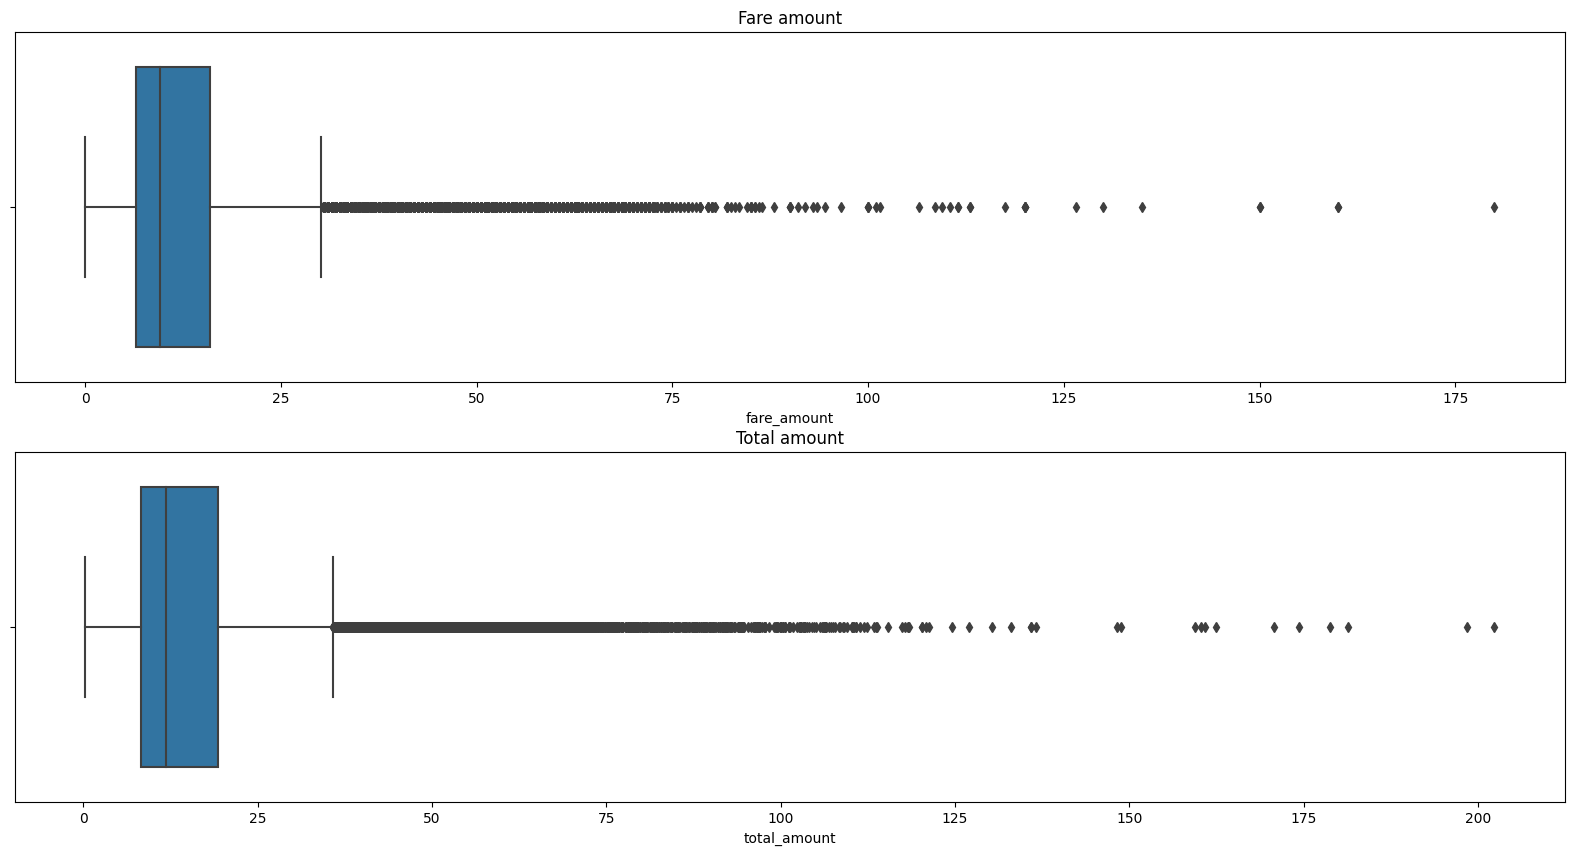

In [30]:
fig, (ax7,ax8) = plt.subplots(nrows=2, figsize=(20,10))
ax7.set_title("Fare amount")
sns.boxplot(x=df.fare_amount,ax=ax7)
ax8.set_title("Total amount")
sns.boxplot(x=df.total_amount,ax=ax8)


As we can see having outliers are present. they will cause seeing actual histogram

<AxesSubplot: ylabel='DOZone'>

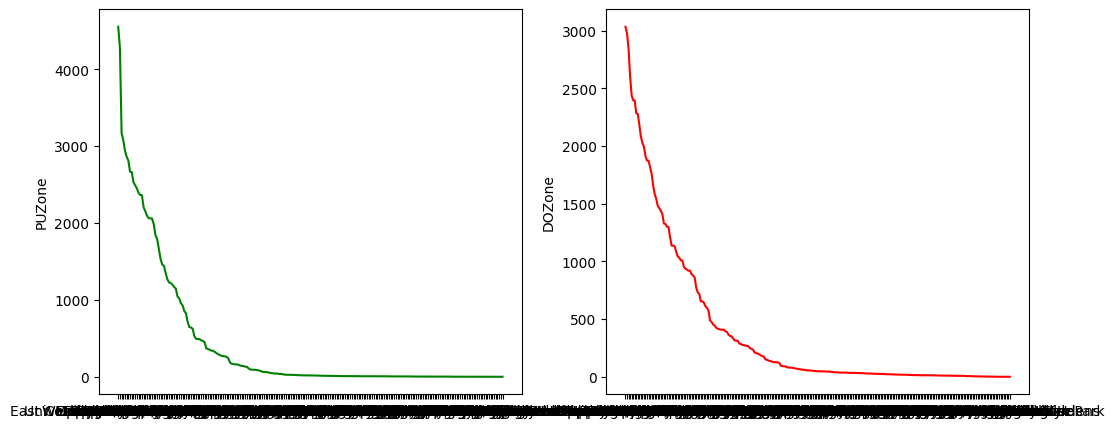

In [31]:
fig,(PUc,DOc) = plt.subplots(ncols=2,figsize=(12,5))
PUcount = df.PUZone.value_counts()
sns.lineplot(PUcount,color='Green',ax=PUc)

DOcount = df.DOZone.value_counts()
sns.lineplot(DOcount,color='Red')



# Bivariate analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [3]:
df = pd.read_pickle('pickled_parquet_1.pkl')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7462183 entries, 0 to 7696614
Data columns (total 24 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  total_amount           float64        
 12  PUmonth                int64          
 13  DOmonth                int64          
 14  PUday                  object         
 15  DOday                  object         
 16  PUhour                 int64          
 17  DOhour                 int64          
 18  to

<AxesSubplot: xlabel='PUhour', ylabel='total_sec'>

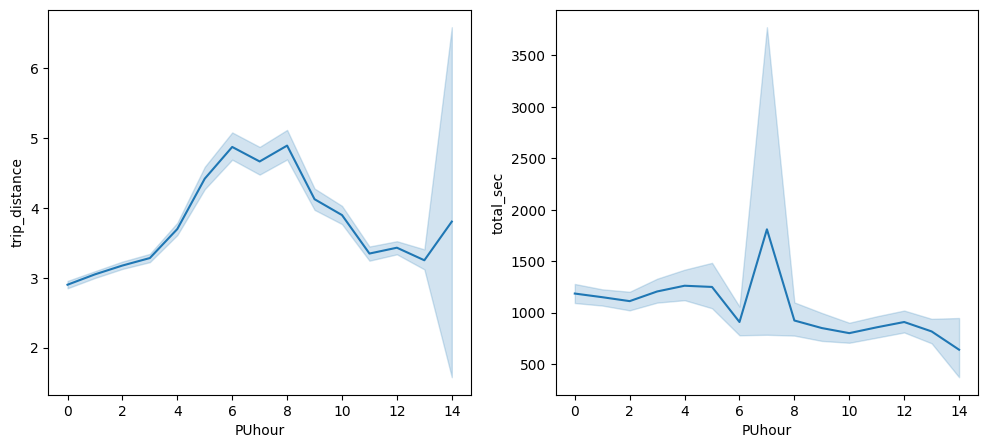

In [36]:
fig,(ax11,ax12) = plt.subplots(ncols=2,figsize=(12,5))
sns.lineplot(x='PUhour',y='trip_distance',data=df,ax=ax11)
  
sns.lineplot(x='PUhour',y='total_sec',data=df,ax=ax12)

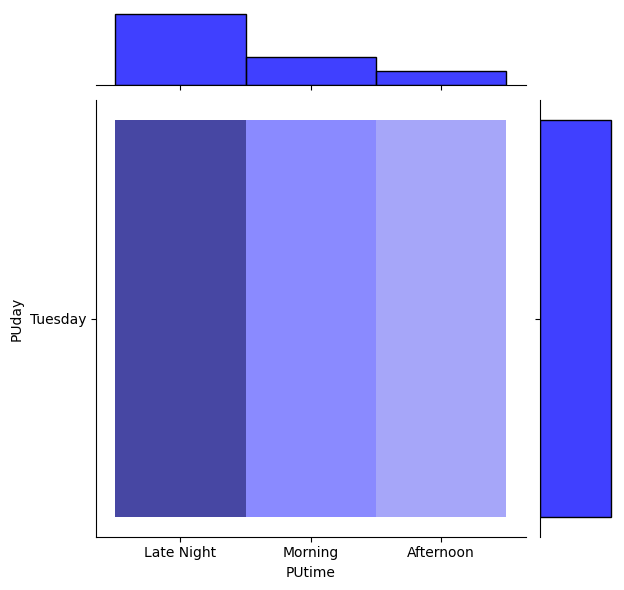

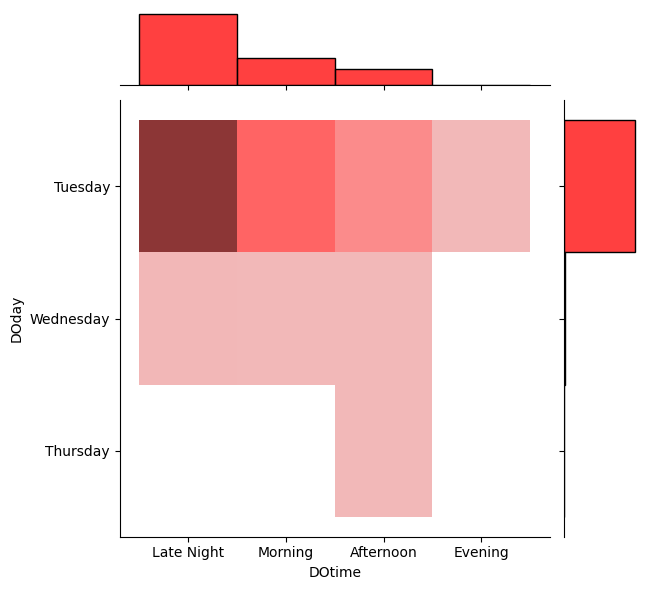

In [55]:
sns.jointplot(y='PUday',x='PUtime',data=df,kind='hist',color='blue')

sns.jointplot(y='DOday',x='DOtime',data=df,kind='hist',color='red')

<AxesSubplot: xlabel='PUday', ylabel='count'>

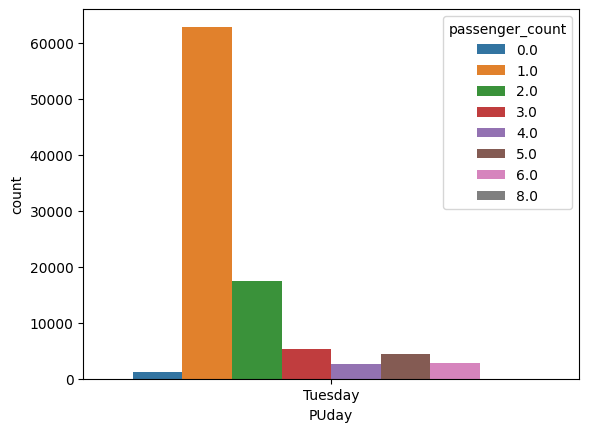

In [131]:
sns.countplot(x='PUday',data=df,hue='passenger_count')

<AxesSubplot: xlabel='passenger_count', ylabel='total_amount'>

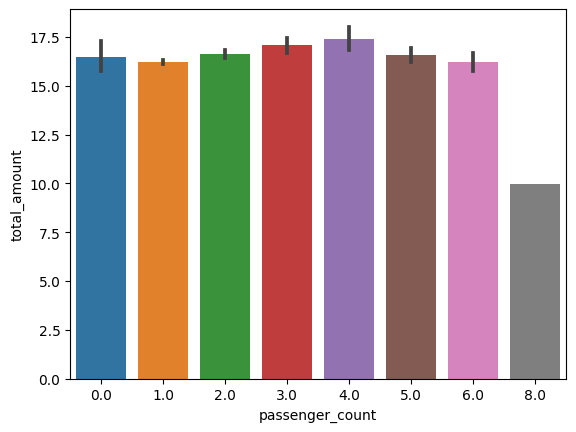

In [134]:
sns.barplot(x='passenger_count',y='total_amount',data=df)

In [146]:
df[['passenger_count','total_amount']].corr(method='pearson')

,passenger_count,total_amount
passenger_count,1.000000,0.011694
total_amount,0.011694,1.000000


<Figure size 1000x1000 with 0 Axes>

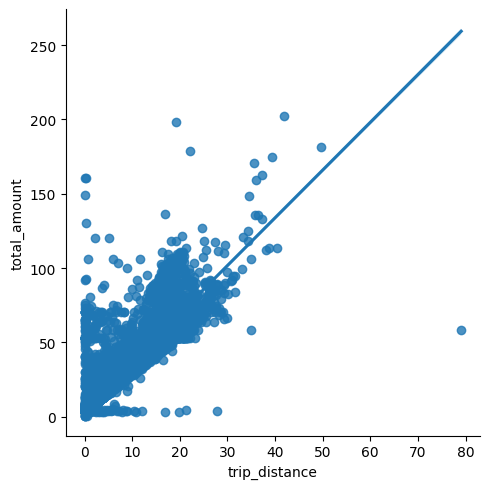

In [250]:
plt.figure(figsize=(10,10))
sns.lmplot(x='trip_distance',y='total_amount',data=df)

<AxesSubplot: xlabel='PULocationID', ylabel='DOLocationID'>

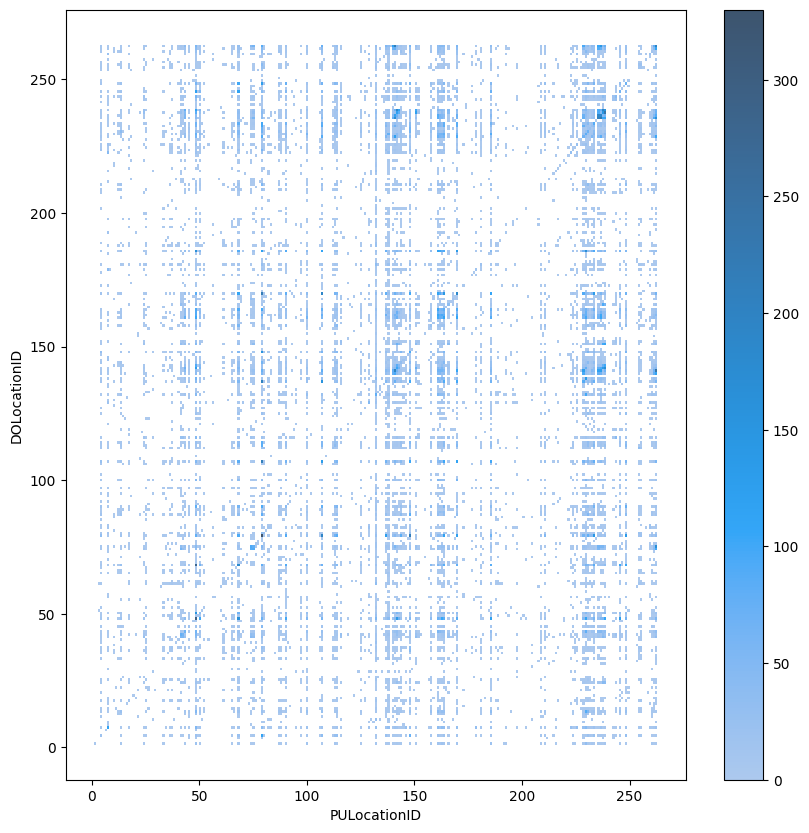

In [37]:
plt.figure(figsize=(10,10))
sns.histplot(x='PULocationID',y='DOLocationID',data=df,bins=263,cbar=True)

In [158]:
grp = df.groupby(['PULocationID','DOLocationID']).size()
#grp = grp.sort_values(ascending=False)

In [159]:
grp

PULocationID  DOLocationID
1             1                 3
3             51                1
              61                1
4             4                18
              7                 4
                             ... 
263           258               1
              260               6
              261               1
              262             113
              263             198
Length: 9810, dtype: int64

In [4]:
df1 = df[['passenger_count','trip_distance','total_amount','total_sec','PUhour','DOhour']]

<AxesSubplot: >

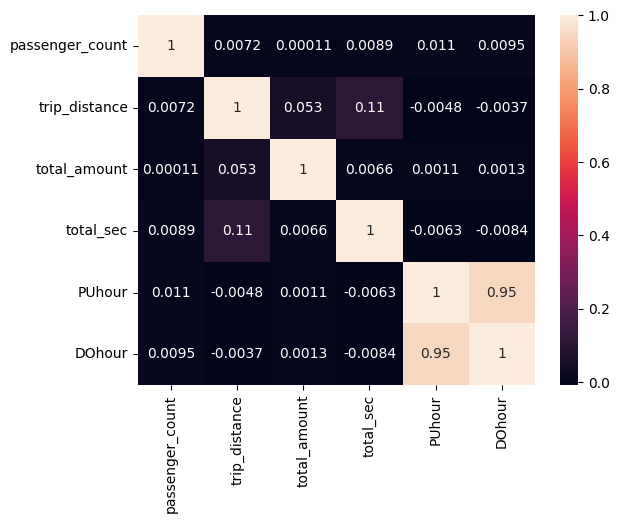

In [22]:
sns.heatmap(df1.corr(),annot=True)

In [53]:
dfshort = df[:5000].copy()

<AxesSubplot: xlabel='PUhour', ylabel='total_sec'>

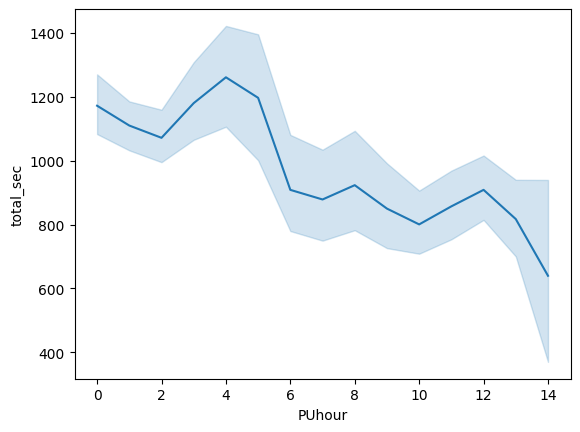

In [236]:
sns.lineplot(x='PUhour',y='total_sec',data=df)

In [43]:
df['PUdayn'] = df.tpep_pickup_datetime.dt.dayofweek
df['DOdayn'] = df.tpep_dropoff_datetime.dt.dayofweek

In [52]:
daten = {'Morning':1,
        'Afternoon':2,
        'Evening':3,
        'Late Night':4}
df['PUtimen'] = df.PUtime.map(daten)
df['DOtimen'] = df.DOtime.map(daten)

In [54]:
x = dfshort.drop(['duration','tpep_pickup_datetime','tpep_dropoff_datetime','store_and_fwd_flag','PUday','DOday','PUZone','DOZone','PUtime','DOtime'],axis=1)

In [97]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,r2_score
from sklearn.preprocessing import StandardScaler

In [64]:
train_x,test_x,train_y,test_y = train_test_split(x,dfshort['total_amount'],test_size=0.3)

In [98]:
model = SGDRegressor()
model.

AttributeError: 'SGDRegressor' object has no attribute 'fit_'

In [72]:
z = model.predict(test_x)

In [88]:
model.feature_names_in_

array(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'PUmonth', 'DOmonth', 'PUhour', 'DOhour',
       'total_sec', 'PUdayn', 'DOdayn', 'PUtimen', 'DOtimen'],
      dtype=object)

In [96]:
test_x[:1]

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,PUmonth,DOmonth,PUhour,DOhour,total_sec,PUdayn,DOdayn,PUtimen,DOtimen
3784,2,1.0,0.5,1.0,161,161,2,5.5,6.8,1,1,0,1,397.0,1,1,4,4


In [ ]:
df = df.drop(df[(df.trip_distance>500.0)].index)

In [ ]:
df.trip_distance.plot.hist()

In [ ]:
df.trip_distancedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAigAAAGdCAYAAAA44ojeAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjYuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8o6BhiAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAd2klEQVR4nO3df3TV9WH/8VcSNCKSIFYScoozR9xRZjZb7TBadmTlSC3tORmwjSPt106rPRbcFOomHqWztcZ6tOux1TI9PdUztV3LSd3MWd08eFQ2U3S47ivWUvYdFioE7HEkqBUwyfePHe6MZa1B9L4THo9z7jncz/t9733ff7xPP/n8qBkaGhoKAEBBaqu9AACANxMoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFGdctRdwMAYHB7Nt27ZMnDgxNTU11V4OAPAWDA0NZffu3WlpaUlt7a/eRzIqA2Xbtm2ZNm1atZcBAByErVu35r3vfe+vnDMqA2XixIlJ/vsLNjQ0VHk1AMBb0d/fn2nTplV+x3+VURko+/+s09DQIFAAYJR5K4dnOEgWACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4o/JCbcDYNDAwkLVr12b79u2ZOnVqZs2albq6umovC6gCe1CAInR1dWX69OmZPXt2LrjggsyePTvTp09PV1dXtZcGVIFAAaquq6srCxcuTFtbW3p6erJ79+709PSkra0tCxcuFClwGKoZGhoaqvYiRqq/vz+NjY3p6+tzLx4Y5QYGBjJ9+vS0tbXlgQceGHYL9sHBwXR0dGTDhg3ZtGmTP/fAKDeS3297UICqWrt2bZ5//vlcc801w+IkSWpra7NixYps3rw5a9eurdIKgWoQKEBVbd++PUly2mmnHXB8//b984DDg0ABqmrq1KlJkg0bNhxwfP/2/fOAw4NAAapq1qxZOfHEE3PjjTdmcHBw2Njg4GA6OzvT2tqaWbNmVWmFQDUIFKCq6urqcuutt6a7uzsdHR3DzuLp6OhId3d3brnlFgfIwmHGhdqAqps/f35Wr16d5cuX5+yzz65sb21tzerVqzN//vwqrg6oBqcZA8VwJVkY20by+20PClCMurq6nHvuudVeBlAAx6AAAMURKABAcUYUKAMDA7nuuuvS2tqa8ePH56STTsoXvvCFvPEwlqGhoaxcuTJTp07N+PHjM2fOnGzatGnY+7z00ktZvHhxGhoaMmnSpFx88cV5+eWXD803AgBGvREFype+9KV8/etfz9e+9rU899xz+dKXvpSbb745X/3qVytzbr755tx2221ZtWpV1q1blwkTJmTu3Ll57bXXKnMWL16cZ599Ng8//HC6u7vz+OOP59JLLz103woAGNVGdBbPRz/60TQ1NeUb3/hGZduCBQsyfvz43HvvvRkaGkpLS0uWL1+ez372s0mSvr6+NDU15e67786iRYvy3HPPZcaMGXnqqady5plnJkkeeuihfOQjH8nPfvaztLS0/Np1OIsHAEafd+xmgWeffXbWrFmTn/zkJ0mSf//3f88///M/5/zzz0+SbN68Ob29vZkzZ07lNY2NjZk5c2Z6enqSJD09PZk0aVIlTpJkzpw5qa2tzbp16w74uXv27El/f/+wBwAwdo3oNOOrr746/f39OeWUU1JXV5eBgYF88YtfzOLFi5Mkvb29SZKmpqZhr2tqaqqM9fb2ZsqUKcMXMW5cJk+eXJnzZp2dnbn++utHslQAYBQb0R6U73znO7nvvvty//335+mnn84999yTW265Jffcc887tb4kyYoVK9LX11d5bN269R39PACguka0B+Wqq67K1VdfnUWLFiVJ2tra8tOf/jSdnZ258MIL09zcnCTZsWPHsDuP7tixI6effnqSpLm5OTt37hz2vq+//npeeumlyuvfrL6+PvX19SNZKgAwio1oD8qrr76a2trhL6mrq6vcgbS1tTXNzc1Zs2ZNZby/vz/r1q1Le3t7kqS9vT27du3K+vXrK3MeeeSRDA4OZubMmQf9RQCAsWNEe1A+9rGP5Ytf/GJOOOGE/NZv/Vb+7d/+LV/+8pdz0UUXJUlqampyxRVX5IYbbsjJJ5+c1tbWXHfddWlpaUlHR0eS5NRTT82HP/zhXHLJJVm1alX27duXpUuXZtGiRW/pDB4AYOwbUaB89atfzXXXXZfPfOYz2blzZ1paWvLpT386K1eurMz58z//87zyyiu59NJLs2vXrnzwgx/MQw89lKOOOqoy57777svSpUvzoQ99KLW1tVmwYEFuu+22Q/etAIBRzd2MAYB3xTt2HRQAgHeDQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDjjqr0AgP0GBgaydu3abN++PVOnTs2sWbNSV1dX7WUBVWAPClCErq6uTJ8+PbNnz84FF1yQ2bNnZ/r06enq6qr20oAqEChA1XV1dWXhwoVpa2tLT09Pdu/enZ6enrS1tWXhwoUiBQ5DNUNDQ0PVXsRI9ff3p7GxMX19fWloaKj2coC3YWBgINOnT09bW1seeOCB1Nb+z/83DQ4OpqOjIxs2bMimTZv8uQdGuZH8ftuDAlTV2rVr8/zzz+eaa64ZFidJUltbmxUrVmTz5s1Zu3ZtlVYIVINAAapq+/btSZLTTjvtgOP7t++fBxweBApQVVOnTk2SbNiw4YDj+7fvnwccHgQKUFWzZs3KiSeemBtvvDGDg4PDxgYHB9PZ2ZnW1tbMmjWrSisEqkGgAFVVV1eXW2+9Nd3d3eno6Bh2Fk9HR0e6u7tzyy23OEAWDjMu1AZU3fz587N69eosX748Z599dmV7a2trVq9enfnz51dxdUA1OM0YKIYrycLYNpLfb3tQgGLU1dXl3HPPrfYygAI4BgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAijPiQHnhhRfy8Y9/PMcdd1zGjx+ftra2/Ou//mtlfGhoKCtXrszUqVMzfvz4zJkzJ5s2bRr2Hi+99FIWL16choaGTJo0KRdffHFefvnlt/9tAIAxYUSB8l//9V8555xzcsQRR+T73/9+fvSjH+XWW2/NscceW5lz880357bbbsuqVauybt26TJgwIXPnzs1rr71WmbN48eI8++yzefjhh9Pd3Z3HH388l1566aH7VgDAqFYzNDQ09FYnX3311fmXf/mXrF279oDjQ0NDaWlpyfLly/PZz342SdLX15empqbcfffdWbRoUZ577rnMmDEjTz31VM4888wkyUMPPZSPfOQj+dnPfpaWlpZfu47+/v40Njamr68vDQ0Nb3X5AEAVjeT3e0R7UP7+7/8+Z555Zv7wD/8wU6ZMyfve977cddddlfHNmzent7c3c+bMqWxrbGzMzJkz09PTkyTp6enJpEmTKnGSJHPmzEltbW3WrVt3wM/ds2dP+vv7hz0AgLFrRIHyn//5n/n617+ek08+Of/4j/+Yyy67LH/6p3+ae+65J0nS29ubJGlqahr2uqampspYb29vpkyZMmx83LhxmTx5cmXOm3V2dqaxsbHymDZt2kiWDQCMMiMKlMHBwbz//e/PjTfemPe973259NJLc8kll2TVqlXv1PqSJCtWrEhfX1/lsXXr1nf08wCA6hpRoEydOjUzZswYtu3UU0/Nli1bkiTNzc1Jkh07dgybs2PHjspYc3Nzdu7cOWz89ddfz0svvVSZ82b19fVpaGgY9gAAxq4RBco555yTjRs3Dtv2k5/8JL/xG7+RJGltbU1zc3PWrFlTGe/v78+6devS3t6eJGlvb8+uXbuyfv36ypxHHnkkg4ODmTlz5kF/EQBg7Bg3kslXXnllzj777Nx44435oz/6ozz55JO58847c+eddyZJampqcsUVV+SGG27IySefnNbW1lx33XVpaWlJR0dHkv/e4/LhD3+48qehffv2ZenSpVm0aNFbOoMHABj7RnSacZJ0d3dnxYoV2bRpU1pbW7Ns2bJccskllfGhoaF87nOfy5133pldu3blgx/8YO6444785m/+ZmXOSy+9lKVLl+bBBx9MbW1tFixYkNtuuy3HHHPMW1qD04wBYPQZye/3iAOlBAIFAEafd+w6KAAA7waBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxBAoAUByBAgAUR6AAAMURKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABTnbQXKTTfdlJqamlxxxRWVba+99lqWLFmS4447Lsccc0wWLFiQHTt2DHvdli1bMm/evBx99NGZMmVKrrrqqrz++utvZykAwBhy0IHy1FNP5a//+q/z27/928O2X3nllXnwwQfz3e9+N4899li2bduW+fPnV8YHBgYyb9687N27N0888UTuueee3H333Vm5cuXBfwsAYEw5qEB5+eWXs3jx4tx111059thjK9v7+vryjW98I1/+8pfz+7//+znjjDPyzW9+M0888UR+8IMfJEn+6Z/+KT/60Y9y77335vTTT8/555+fL3zhC7n99tuzd+/eQ/OtAIBR7aACZcmSJZk3b17mzJkzbPv69euzb9++YdtPOeWUnHDCCenp6UmS9PT0pK2tLU1NTZU5c+fOTX9/f5599tkDft6ePXvS398/7AEAjF3jRvqCb3/723n66afz1FNP/dJYb29vjjzyyEyaNGnY9qampvT29lbmvDFO9o/vHzuQzs7OXH/99SNdKgAwSo1oD8rWrVvzZ3/2Z7nvvvty1FFHvVNr+iUrVqxIX19f5bF169Z37bMBgHffiAJl/fr12blzZ97//vdn3LhxGTduXB577LHcdtttGTduXJqamrJ3797s2rVr2Ot27NiR5ubmJElzc/MvndWz//n+OW9WX1+fhoaGYQ8AYOwaUaB86EMfyjPPPJMf/vCHlceZZ56ZxYsXV/59xBFHZM2aNZXXbNy4MVu2bEl7e3uSpL29Pc8880x27txZmfPwww+noaEhM2bMOERfCwAYzUZ0DMrEiRNz2mmnDds2YcKEHHfccZXtF198cZYtW5bJkyenoaEhl19+edrb23PWWWclSc4777zMmDEjn/jEJ3LzzTent7c31157bZYsWZL6+vpD9LUAgNFsxAfJ/jp/9Vd/ldra2ixYsCB79uzJ3Llzc8cdd1TG6+rq0t3dncsuuyzt7e2ZMGFCLrzwwnz+858/1EsBAEapmqGhoaFqL2Kk+vv709jYmL6+PsejAMAoMZLfb/fiAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4owoUDo7O/OBD3wgEydOzJQpU9LR0ZGNGzcOm/Paa69lyZIlOe6443LMMcdkwYIF2bFjx7A5W7Zsybx583L00UdnypQpueqqq/L666+//W8DAIwJIwqUxx57LEuWLMkPfvCDPPzww9m3b1/OO++8vPLKK5U5V155ZR588MF897vfzWOPPZZt27Zl/vz5lfGBgYHMmzcve/fuzRNPPJF77rknd999d1auXHnovhUAMKrVDA0NDR3si1988cVMmTIljz32WH7v934vfX19Of7443P//fdn4cKFSZIf//jHOfXUU9PT05Ozzjor3//+9/PRj34027ZtS1NTU5Jk1apV+Yu/+Iu8+OKLOfLII3/t5/b396exsTF9fX1paGg42OUDAO+ikfx+v61jUPr6+pIkkydPTpKsX78++/bty5w5cypzTjnllJxwwgnp6elJkvT09KStra0SJ0kyd+7c9Pf359lnnz3g5+zZsyf9/f3DHgDA2HXQgTI4OJgrrrgi55xzTk477bQkSW9vb4488shMmjRp2Nympqb09vZW5rwxTvaP7x87kM7OzjQ2NlYe06ZNO9hlAwCjwEEHypIlS7Jhw4Z8+9vfPpTrOaAVK1akr6+v8ti6des7/pkAQPWMO5gXLV26NN3d3Xn88cfz3ve+t7K9ubk5e/fuza5du4btRdmxY0eam5src5588slh77f/LJ/9c96svr4+9fX1B7NUAGAUGtEelKGhoSxdujTf+9738sgjj6S1tXXY+BlnnJEjjjgia9asqWzbuHFjtmzZkvb29iRJe3t7nnnmmezcubMy5+GHH05DQ0NmzJjxdr4LADBGjGgPypIlS3L//ffn7/7u7zJx4sTKMSONjY0ZP358Ghsbc/HFF2fZsmWZPHlyGhoacvnll6e9vT1nnXVWkuS8887LjBkz8olPfCI333xzent7c+2112bJkiX2kgAASUZ4mnFNTc0Bt3/zm9/MJz/5yST/faG25cuX51vf+lb27NmTuXPn5o477hj255uf/vSnueyyy/Loo49mwoQJufDCC3PTTTdl3Li31ktOMwaA0Wckv99v6zoo1SJQAGD0edeugwIA8E4QKABAcQQKAFAcgQIAFEegAADFESgAQHEECgBQHIECABRHoAAAxREoAEBxRnSzQIB30sDAQNauXZvt27dn6tSpmTVrVurq6qq9LKAK7EEBitDV1ZXp06dn9uzZueCCCzJ79uxMnz49XV1d1V4aUAUCBai6rq6uLFy4MG1tbenp6cnu3bvT09OTtra2LFy4UKTAYcjdjIGqGhgYyPTp09PW1pYHHnggtbX/8/9Ng4OD6ejoyIYNG7Jp0yZ/7oFRzt2MgVFj7dq1ef7553PNNdcMi5Mkqa2tzYoVK7J58+asXbu2SisEqkGgAFW1ffv2JMlpp512wPH92/fPAw4PAgWoqqlTpyZJNmzYcMDx/dv3zwMODwIFqKpZs2blxBNPzI033pjBwcFhY4ODg+ns7Exra2tmzZpVpRUC1SBQgKqqq6vLrbfemu7u7nR0dAw7i6ejoyPd3d255ZZbHCALhxkXagOqbv78+Vm9enWWL1+es88+u7K9tbU1q1evzvz586u4OqAanGYMFMOVZGFsG8nvtz0oQDHq6upy7rnnVnsZQAEcgwIAFEegAADFESgAQHEECgBQHIECABTHWTxAMZxmDOxnDwpQhK6urpx00kmZPXt2LrjggsyePTsnnXRSurq6qr00oAoEClB1XV1dWbBgQbZs2TJs+5YtW7JgwQKRAochgQJU1cDAQC666KIkyfHHH5+77ror27dvz1133ZXjjz8+SXLRRRdlYGCgmssE3mUCBaiqRx55JH19fTn22GPzwgsv5FOf+lSam5vzqU99Ki+88EKOPfbY9PX15ZFHHqn2UoF3kUABqupv/uZvkiSf//znU1NTk0cffTTf+ta38uijj6ampiZ/+Zd/OWwecHhwFg9QVbt3706SbNu2LdOnT8/zzz9fGTvxxBOzaNGiYfOAw4NAAapq1qxZeeCBB9LZ2Zl58+blqquuyvjx4/OLX/wi//AP/5CbbrqpMg84fNQMDQ0NVXsRIzWS2zUDZfvFL36Ro48+OkkqYbLfG5+/+uqrGT9+fFXWCBwaI/n9dgwKUFXr1q2r/PuNcfLm52+cB4x9AgWoqhdeeCFJMmXKlAOO79++fx5weBAoQFW9+OKLSZKdO3fmqKOOGjZ21FFHZefOncPmAYcHgQJU1XHHHVf595svxvbG52+cB4x9AgWoqv17SJJk3759w8be+PyN84CxT6AAVfXzn//8kM4DxgaBAlTVGy/MduSRRw4be+PzN84Dxj6BAlTVxo0bK//eu3fvsLE3Pn/jPGDsEyhAVdXU1BzSecDYIFCAqpo6deohnQeMDQIFqKpXXnnlkM4DxgaBAlTVW71CrCvJwuFFoABV9VbvVzoK72sKvA0CBaiqyZMnH9J5wNggUICq2rx58yGdB4wNAgWoqrd6E0A3C4TDi0ABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKU9VAuf3223PiiSfmqKOOysyZM/Pkk09WczkAQCHGVeuD//Zv/zbLli3LqlWrMnPmzHzlK1/J3Llzs3HjxkyZMqVaywIOwquvvpof//jH7/jnPP300wf1ulNOOSVHH330IV4N8E6qGRoaGqrGB8+cOTMf+MAH8rWvfS1JMjg4mGnTpuXyyy/P1Vdf/Stf29/fn8bGxvT19aWhoeHdWC6MWZs2bcru3bvf1ns899xz+fjHP36IVnTo3XvvvTn11FPf1ntMnDgxJ5988iFaERyeRvL7XZU9KHv37s369euzYsWKyrba2trMmTMnPT09vzR/z5492bNnT+V5f3//u7JOGOv+7/p1+eRHzz4k7/W+5nIPabv1s//nkLzPdx75Yaaf2nZI3gv41aoSKD//+c8zMDCQpqamYdubmpoOuJu4s7Mz119//bu1PDhs/L9138/Tnz6m2ssYNbb0P59EoMC7oWrHoIzEihUrsmzZssrz/v7+TJs2rYorgrFh1h9cnO99L5WD1Q/Wnj17sm3btoN+/bXXXvtr59xwww0H/f4tLS2pr68/6NcnyYQJE3LC+z70tt4DeOuqEijvec97UldXlx07dgzbvmPHjjQ3N//S/Pr6+rf9Hxfgl71n6rT8wWf+8pC81+lv47UfuXhFampq/tfxKh0qB1RRVf5ofOSRR+aMM87ImjVrKtsGBwezZs2atLe3V2NJQJX9bxEiTuDwVLU/8SxbtiwXXnhhzjzzzPzu7/5uvvKVr+SVV17Jn/zJn1RrSUCViRFgv6oFyh//8R/nxRdfzMqVK9Pb25vTTz89Dz300C8dOAsAHH6qdh2Ut8N1UABg9BnJ73e5Fy4AAA5bAgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDiCBQAoDhVu9T927H/4rf9/f1VXgkA8Fbt/91+KxexH5WBsnv37iTJtGnTqrwSAGCkdu/encbGxl85Z1Tei2dwcDDbtm3LxIkTU1NTU+3lAIdQf39/pk2blq1bt7rXFowxQ0ND2b17d1paWlJb+6uPMhmVgQKMXW4GCiQOkgUACiRQAIDiCBSgKPX19fnc5z6X+vr6ai8FqCLHoAAAxbEHBQAojkABAIojUACA4ggUAKA4AgUowuOPP56PfexjaWlpSU1NTR544IFqLwmoIoECFOGVV17J7/zO7+T222+v9lKAAozKmwUCY8/555+f888/v9rLAAphDwoAUByBAgAUR6AAAMURKABAcQQKAFAcZ/EARXj55ZfzH//xH5Xnmzdvzg9/+MNMnjw5J5xwQhVXBlSDuxkDRXj00Ucze/bsX9p+4YUX5u677373FwRUlUABAIrjGBQAoDgCBQAojkABAIojUACA4ggUAKA4AgUAKI5AAQCKI1AAgOIIFACgOAIFACiOQAEAiiNQAIDi/H+h4p9JR4IE/wAAAABJRU5ErkJggg==.max()

In [ ]:
print("Max and min Pickup location ID :",df.PULocationID.max(),df.PULocationID.min())

In [ ]:
df['PUZone'].value_counts()

In [ ]:
df.PULocationID.map(taxizone.Borough).value_counts()

In [ ]:
df.DOLocationID.map(taxizone.Borough).value_counts()

In [57]:
import geopandas as gpd

In [58]:
taxizone = pd.read_csv("taxizone.csv")

In [59]:
maps = gpd.read_file("taxi_zones.zip")

In [60]:
x = df.PULocationID.map(taxizone.Borough)
y = df.DOLocationID.map(taxizone.Borough)

In [61]:
PUmap = maps.borough.map(x.value_counts())
DOmap = maps.borough.map(y.value_counts())

In [62]:
PUmap = maps.LocationID.map(df.PULocationID)
DOmap = maps.LocationID.map(df.DOLocationID)

In [65]:
df['PUZone'] = df.PULocationID.map(taxizone.Zone)
df['DOZone'] = df.DOLocationID.map(taxizone.Zone)

<AxesSubplot: >

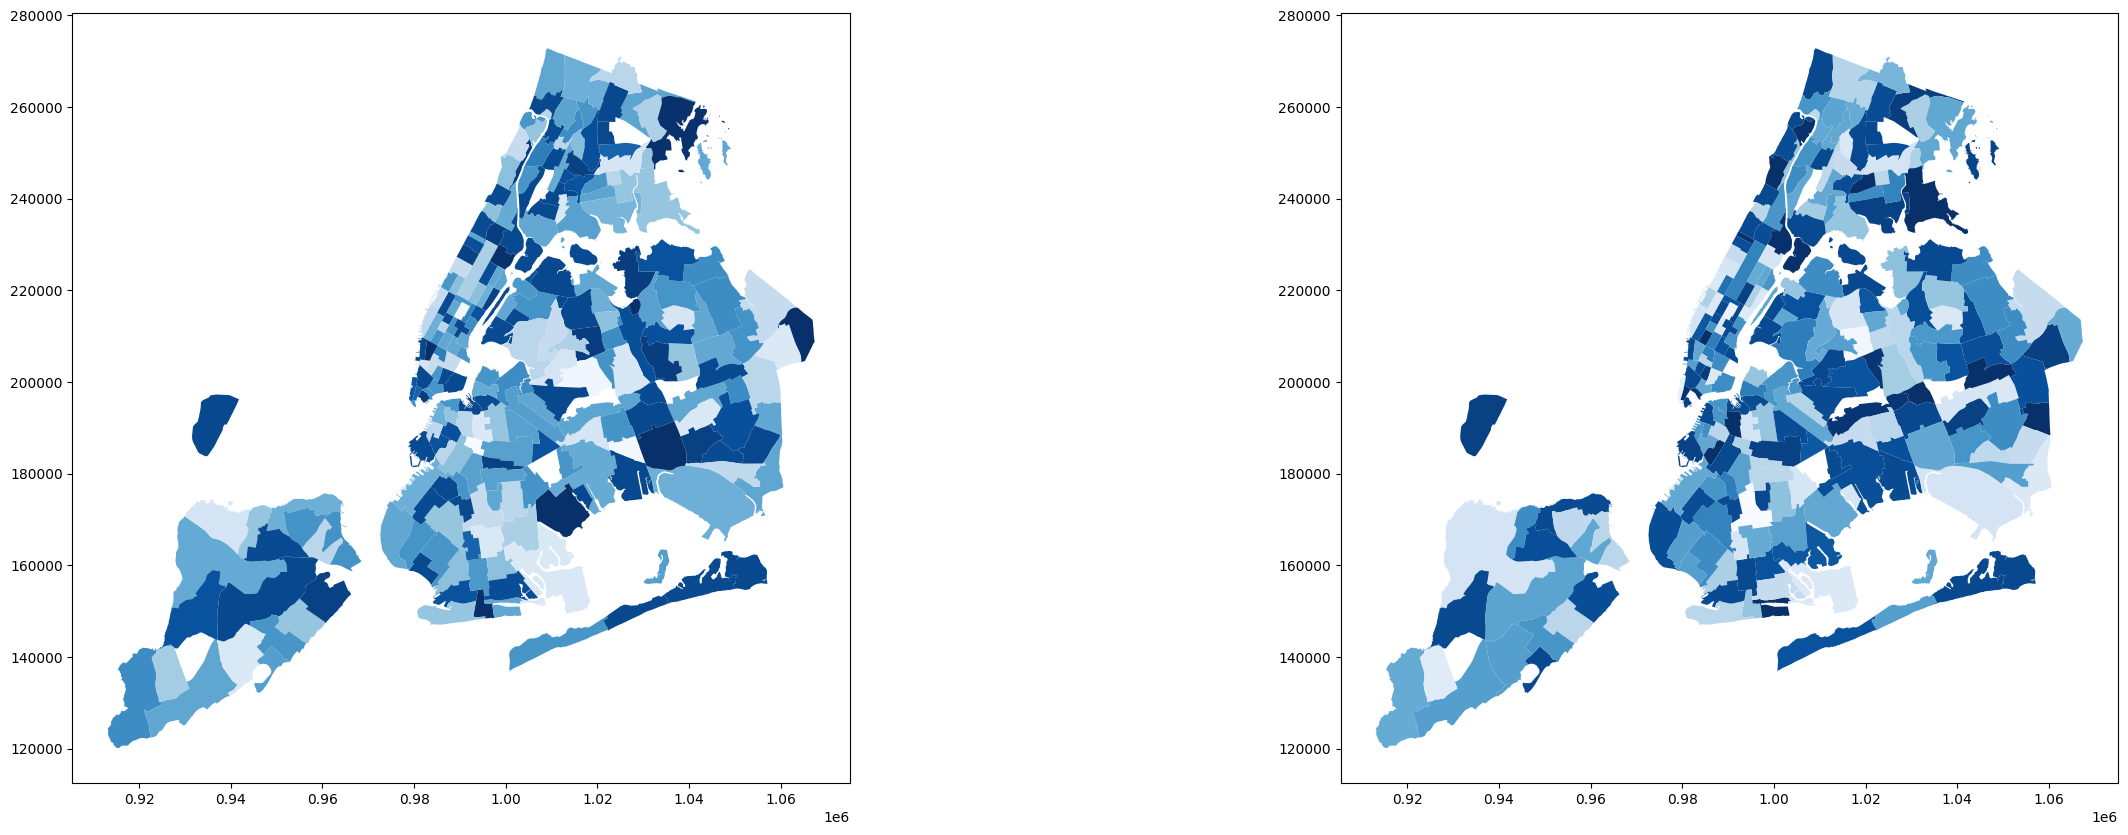

In [66]:
fig,(PUm,DOm) = plt.subplots(ncols=2, figsize=(30,10))
maps.plot(column=PUmap,ax=PUm,cmap='Blues')
maps.plot(column=DOmap,ax=DOm,cmap='Blues')

<AxesSubplot: >

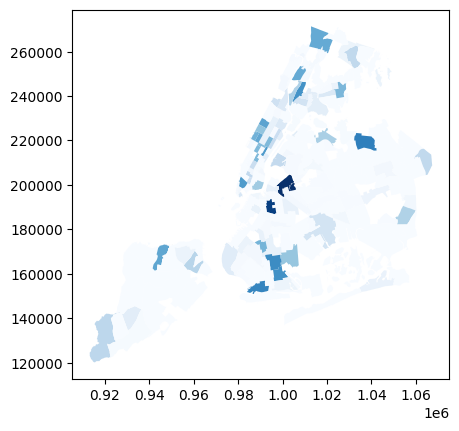

In [68]:
maps.plot(column = maps.zone.map(df.PUZone.value_counts()), cmap='Blues')

In [73]:
df.PUZone.value_counts()

East Williamsburg     4554
Clinton Hill          4280
Murray Hill-Queens    3170
Gravesend             3077
Midwood               2941
                      ... 
Broad Channel            1
Crotona Park East        1
Columbia Street          1
Great Kills Park         1
East Harlem North        1
Name: PUZone, Length: 228, dtype: int64

In [68]:
df1.loc[(df1.payment_type == 3),['payment_type', 'fare_amount']]

,payment_type,fare_amount
176,3,4.0
214,3,8.0
371,3,5.0
389,3,7.0
475,3,42.5
...,...,...
7666490,3,5.0
7666891,3,4.5
7666995,3,2.5
7667324,3,10.5


In [61]:
any((df.duration<0))

True

#references


#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
#https://medium.com/analytics-vidhya/exploratory-data-analysis-nyc-taxi-price-prediction-using-python-44fce176a8fe